In [0]:
ls

'Colab Notebooks'/  'kaggle (1).json'         test_df.csv
 IMB_GfMTrF.gif      kaggle.json              test_df.csv.zip
 IMB_SGarK2.gif      sample_submission.csv    train_df.csv
 IMB_xLv8rU.gif      submission.csv           train_df.csv.zip
 IMG_3260.JPG        submission_l9_adam.csv   untitled


In [0]:
cd /content/drive/My Drive/tobigs_7HW

/content/drive/My Drive/tobigs_7HW


In [0]:
from google.colab import files 
files.upload() 
# json 파일 옮겨주기 
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/ 
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json 
# json 파일 제대로 업로드 됐는지 확인 
!ls -1ha kaggle.json 
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

Saving kaggle.json to kaggle (5).json
kaggle.json
ref                                                                deadline             category             reward  teamCount  userHasEntered  
-----------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                                   2030-01-01 00:00:00  Getting Started   Knowledge       2227           False  
titanic                                                            2030-01-01 00:00:00  Getting Started   Knowledge      16541           False  
house-prices-advanced-regression-techniques                        2030-01-01 00:00:00  Getting Started   Knowledge       4551           False  
connectx                                                           2030-01-01 00:00:00  Getting Started   Knowledge        335           False  
competitive-data-science-predict-future-sales                      2020-12-31 23

In [0]:
#! kaggle competitions download -c tobigs13nn

test_df.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_df.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#! unzip train_df.csv.zip

Archive:  train_df.csv.zip
replace train_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
#! unzip test_df.csv.zip

Archive:  test_df.csv.zip
  inflating: test_df.csv             


In [0]:
ls

'7_HW(keras_CNN).ipynb'   sample_submission.csv      submission_2D_model7.csv
'7_HW(keras).ipynb'       submission_2D_47.csv       submission.csv
'7_HW(pytorch).ipynb'     submission_2D_47_re.csv    submission_l9_adam.csv
'kaggle (1).json'         submission_2D_60.csv       test_df.csv
'kaggle (2).json'         submission_2D.csv          test_df.csv.zip
'kaggle (3).json'         submission_2D_model3.csv   train_df.csv
'kaggle (4).json'         submission_2D_model4.csv   train_df.csv.zip
'kaggle (5).json'         submission_2D_model5.csv
 kaggle.json              submission_2D_model6.csv


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [169]:
#test = pd.read_csv("test_df.csv")
train = pd.read_csv("train_df.csv")

print(f"Train data shape {train.shape}")
#print(f"Test data shape {test.shape}")


Train data shape (42000, 785)


In [170]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values
#X는 이미지의 픽셀 정보(0~255), y는 분류할 숫자(0~9) 이므로 전처리를 위해 따로 분리

In [172]:
y = tf.keras.utils.to_categorical(y)
y.shape

(42000, 10)

In [173]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [174]:
X = X/255
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X, y, train_size=0.85,random_state=10)

(35700, 784) 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


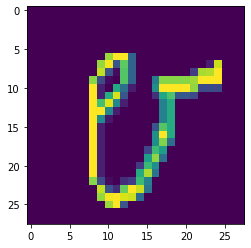

In [176]:
import matplotlib.pyplot as plt
print(x_train.shape, y_train[0].argmax())
print(y_train[0])
plt.imshow(x_train[0].reshape(28, 28, 1)[:,:,0])

**Model_1** 

4층(input - 256 - 128 - 64 - output)

activation function = relu

optimizer = adam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He -> 경험적으로 Xavier보다 He가 성능이 약간 좋다더라...사실 해봐야되는뎅 귀찮앙)와 batch_size(1024 ->클수록 좋다), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [0]:
num_calsses = 10
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="relu",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="relu",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________

In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [0]:
batch_size=1024
epochs = 150

In [0]:

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 2s 64us/sample - loss: 0.6357 - acc: 0.8107 - val_loss: 0.5434 - val_acc: 0.9268
Epoch 2/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1645 - acc: 0.9533 - val_loss: 0.3076 - val_acc: 0.9583
Epoch 3/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1213 - acc: 0.9644 - val_loss: 0.2042 - val_acc: 0.9690
Epoch 4/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.0995 - acc: 0.9708 - val_loss: 0.1414 - val_acc: 0.9727
Epoch 5/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.0847 - acc: 0.9757 - val_loss: 0.1018 - val_acc: 0.9794
Epoch 6/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.0731 - acc: 0.9783 - val_loss: 0.0808 - val_acc: 0.9800
Epoch 7/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.0648 - acc: 0.9808 - val_lo

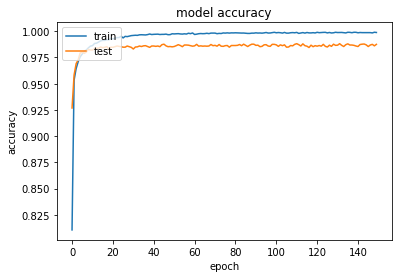

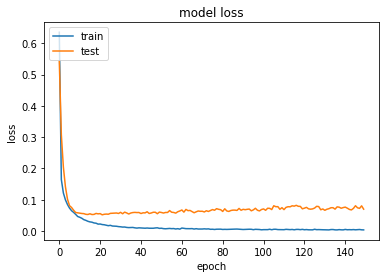

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

val_acc: 0.975

**Model_2** 
*Model_1에서 activation function만 변경*

4층(input - 256 - 128 - 64 - output)

activation function = selu

optimizer = adam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [0]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="selu",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="selu",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model_2.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________________________

In [0]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [0]:
history_2 = model_2.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 1s 22us/sample - loss: 0.5220 - acc: 0.8450 - val_loss: 0.3103 - val_acc: 0.9103
Epoch 2/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1599 - acc: 0.9517 - val_loss: 0.2077 - val_acc: 0.9422
Epoch 3/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.1264 - acc: 0.9619 - val_loss: 0.1731 - val_acc: 0.9510
Epoch 4/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1100 - acc: 0.9670 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 5/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0984 - acc: 0.9706 - val_loss: 0.1106 - val_acc: 0.9703
Epoch 6/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0872 - acc: 0.9732 - val_loss: 0.1009 - val_acc: 0.9708
Epoch 7/150
35700/35700 [==============================] - 0s 11us/sample - loss: 0.0797 - acc: 0.9758 - val_lo

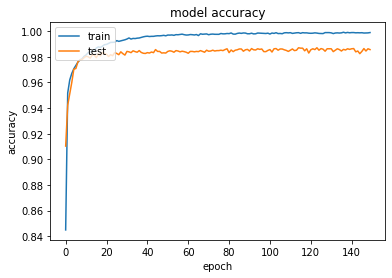

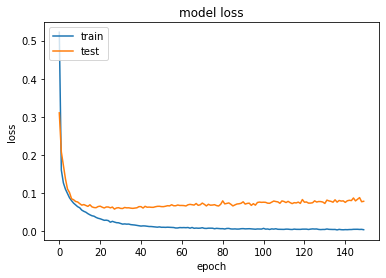

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc = 0.9856**

**Model_3** 

*Model_1,2에서 activation function만 변경*

4층(input - 256 - 128 - 64 - output)

activation function = swish

optimizer = adam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [0]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Activation

def swish(x, beta = 1):
    return (x * tf.keras.backend.sigmoid(beta * x))
get_custom_objects().update({'swish': Activation(swish)})

#keras에 없는 activation function이므로 get_custom_objects로 만들어서 사용

In [26]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [28]:
history_3 = model_3.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 1s 24us/sample - loss: 0.5839 - acc: 0.8296 - val_loss: 0.6401 - val_acc: 0.8756
Epoch 2/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1533 - acc: 0.9557 - val_loss: 0.3568 - val_acc: 0.9390
Epoch 3/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1123 - acc: 0.9677 - val_loss: 0.2426 - val_acc: 0.9589
Epoch 4/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0902 - acc: 0.9730 - val_loss: 0.1651 - val_acc: 0.9654
Epoch 5/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0785 - acc: 0.9763 - val_loss: 0.1171 - val_acc: 0.9748
Epoch 6/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0661 - acc: 0.9799 - val_loss: 0.0866 - val_acc: 0.9776
Epoch 7/150
35700/35700 [==============================] - 0s 12us/sample - loss: 0.0598 - acc: 0.9816 - val_lo

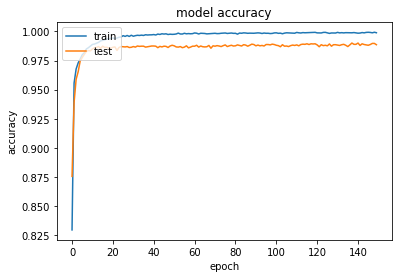

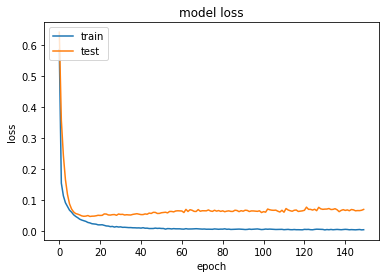

In [29]:
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc =  0.9886**

같은 condition에서 relu, selu, swish를 비교해 보았을 때, swish가 가장 높은 accuracy를 보였다.
(이하 model들의 activation function은 swish를 사용)

**Model_4** 

*Model_3에서 optimizer만 변경*

4층(input - 256 - 128 - 64 - output)

activation function = swish

optimizer = RAdam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [45]:
ls

'7_HW(keras_CNN).ipynb'   RAdam.py                   submission_2D_model6.csv
'7_HW(keras).ipynb'       sample_submission.csv      submission_2D_model7.csv
'7_HW(pytorch).ipynb'     submission_2D_47.csv       submission.csv
'kaggle (1).json'         submission_2D_47_re.csv    submission_l9_adam.csv
'kaggle (2).json'         submission_2D_60.csv       test_df.csv
'kaggle (3).json'         submission_2D.csv          test_df.csv.zip
'kaggle (4).json'         submission_2D_model3.csv   train_df.csv
'kaggle (5).json'         submission_2D_model4.csv   train_df.csv.zip
 kaggle.json              submission_2D_model5.csv


In [58]:
from keras_radam.training import RAdamOptimizer
opt = RAdamOptimizer(learning_rate=1e-3)
#RAdam 객체 선언

model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_4.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_30 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_31 (Batc (None, 128)               512       
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)              

In [59]:
history_4 = model_4.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 1s 41us/sample - loss: 2.3327 - acc: 0.2096 - val_loss: 2.0238 - val_acc: 0.4810
Epoch 2/150
35700/35700 [==============================] - 1s 15us/sample - loss: 1.0956 - acc: 0.6941 - val_loss: 1.4533 - val_acc: 0.8292
Epoch 3/150
35700/35700 [==============================] - 1s 16us/sample - loss: 0.5425 - acc: 0.8767 - val_loss: 0.9554 - val_acc: 0.8921
Epoch 4/150
35700/35700 [==============================] - 1s 16us/sample - loss: 0.3389 - acc: 0.9202 - val_loss: 0.6098 - val_acc: 0.9259
Epoch 5/150
35700/35700 [==============================] - 1s 16us/sample - loss: 0.2479 - acc: 0.9387 - val_loss: 0.3930 - val_acc: 0.9448
Epoch 6/150
35700/35700 [==============================] - 1s 16us/sample - loss: 0.1956 - acc: 0.9486 - val_loss: 0.2646 - val_acc: 0.9527
Epoch 7/150
35700/35700 [==============================] - 1s 16us/sample - loss: 0.1665 - acc: 0.9539 - val_lo

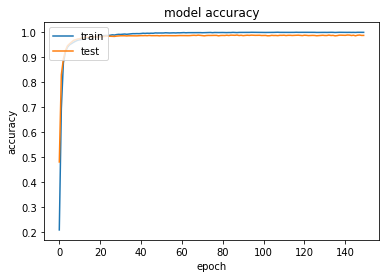

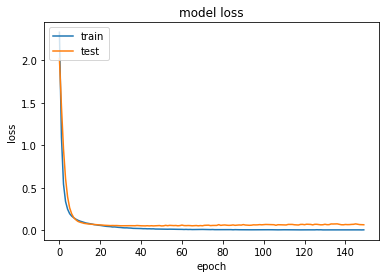

In [61]:
plt.plot(history_4.history['acc'])
plt.plot(history_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc =  0.9863**

adam보다 val_acc가 0.0023낮지만, 
adam과는 다르게 train과 test의 acc,loss이가 거의 없음을 확인할 수 있다.
(이하 모델의 optimizer는 rdam으로 사용)

In [0]:
# tensorflow 2.0에서 lookahead 사용하는법 알랴주세여 갓승현님 ㅠㅠ

**Model_5** 

*Model_1,2,3,4를 비교하여 activation function = swish, opimizer =  RAdam을 선택하였다. 이제 layer의 구조를 바꾸어 보자*

5층(input - 128 - 256 - 128 - 64 - output)

activation function = swish

optimizer = RAdam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [102]:
opt = RAdamOptimizer(learning_rate=1e-3)
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_5.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = Radam
model_5.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 128)               100480    
_________________________________________________________________
batch_normalization_71 (Batc (None, 128)               512       
_________________________________________________________________
dropout_69 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_72 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_70 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 128)             

In [86]:
history_5 = model_5.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 2s 60us/sample - loss: 2.4447 - acc: 0.1966 - val_loss: 2.1596 - val_acc: 0.3179
Epoch 2/150
35700/35700 [==============================] - 1s 19us/sample - loss: 1.3055 - acc: 0.6092 - val_loss: 1.7248 - val_acc: 0.7490
Epoch 3/150
35700/35700 [==============================] - 1s 19us/sample - loss: 0.6557 - acc: 0.8299 - val_loss: 1.1196 - val_acc: 0.8970
Epoch 4/150
35700/35700 [==============================] - 1s 19us/sample - loss: 0.3990 - acc: 0.8970 - val_loss: 0.6332 - val_acc: 0.9238
Epoch 5/150
35700/35700 [==============================] - 1s 19us/sample - loss: 0.2889 - acc: 0.9245 - val_loss: 0.3605 - val_acc: 0.9427
Epoch 6/150
35700/35700 [==============================] - 1s 19us/sample - loss: 0.2302 - acc: 0.9373 - val_loss: 0.2312 - val_acc: 0.9522
Epoch 7/150
35700/35700 [==============================] - 1s 19us/sample - loss: 0.1950 - acc: 0.9458 - val_lo

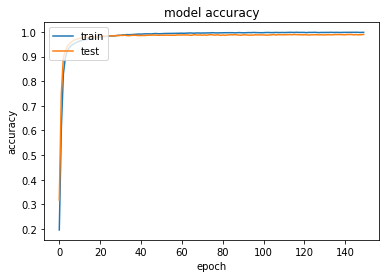

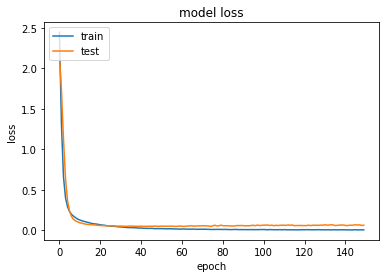

In [87]:
plt.plot(history_5.history['acc'])
plt.plot(history_5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc: = 0.9895**

**Model_6** 

*Model_1,2,3,4를 비교하여 activation function = swish, opimizer =  RAdam을 선택하였다. 이제 layer의 구조를 바꾸어 보자*

6층(input - 128 - 256 - 256 - 128 - 64 - output)

activation function = swish

optimizer = RAdam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [93]:
opt = RAdamOptimizer(learning_rate=1e-3)
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_6.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = Radam
model_6.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 128)               100480    
_________________________________________________________________
batch_normalization_60 (Batc (None, 128)               512       
_________________________________________________________________
dropout_58 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_61 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 256)             

In [94]:
history_6 = model_6.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 3s 84us/sample - loss: 2.4098 - acc: 0.1893 - val_loss: 2.2091 - val_acc: 0.4860
Epoch 2/150
35700/35700 [==============================] - 1s 23us/sample - loss: 1.3200 - acc: 0.5975 - val_loss: 1.8348 - val_acc: 0.7671
Epoch 3/150
35700/35700 [==============================] - 1s 24us/sample - loss: 0.6746 - acc: 0.8264 - val_loss: 1.1677 - val_acc: 0.8879
Epoch 4/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.3965 - acc: 0.8988 - val_loss: 0.5974 - val_acc: 0.9257
Epoch 5/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.2826 - acc: 0.9246 - val_loss: 0.3163 - val_acc: 0.9417
Epoch 6/150
35700/35700 [==============================] - 1s 24us/sample - loss: 0.2215 - acc: 0.9377 - val_loss: 0.1995 - val_acc: 0.9516
Epoch 7/150
35700/35700 [==============================] - 1s 24us/sample - loss: 0.1894 - acc: 0.9466 - val_lo

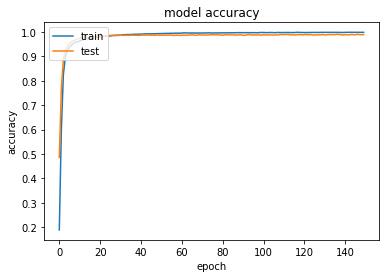

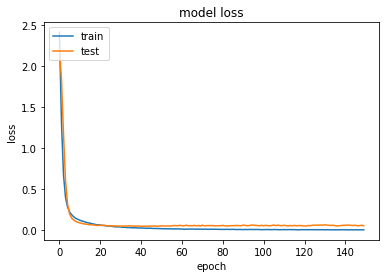

In [95]:
plt.plot(history_6.history['acc'])
plt.plot(history_6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc = 0.9886**

**Model_7** 

*Model_1,2,3,4를 비교하여 activation function = swish, opimizer =  RAdam을 선택하였다. 이제 layer의 구조를 바꾸어 보자*

6층(input - 128 - 256  - 128 - 64 - 32 - output)

activation function = swish

optimizer = RAdam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

In [96]:

model_7 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_7.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = Radam
model_7.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 128)               100480    
_________________________________________________________________
batch_normalization_64 (Batc (None, 128)               512       
_________________________________________________________________
dropout_62 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_65 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 128)             

In [97]:
history_7 = model_7.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150
35700/35700 [==============================] - 3s 91us/sample - loss: 0.4931 - acc: 0.8678 - val_loss: 0.3374 - val_acc: 0.9313
Epoch 2/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.1324 - acc: 0.9611 - val_loss: 0.1467 - val_acc: 0.9619
Epoch 3/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.1041 - acc: 0.9691 - val_loss: 0.1055 - val_acc: 0.9708
Epoch 4/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.0893 - acc: 0.9731 - val_loss: 0.0823 - val_acc: 0.9756
Epoch 5/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.0797 - acc: 0.9761 - val_loss: 0.0762 - val_acc: 0.9775
Epoch 6/150
35700/35700 [==============================] - 1s 24us/sample - loss: 0.0688 - acc: 0.9796 - val_loss: 0.0700 - val_acc: 0.9806
Epoch 7/150
35700/35700 [==============================] - 1s 23us/sample - loss: 0.0637 - acc: 0.9801 - val_lo

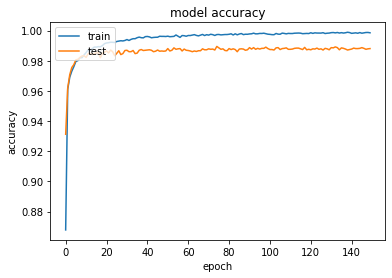

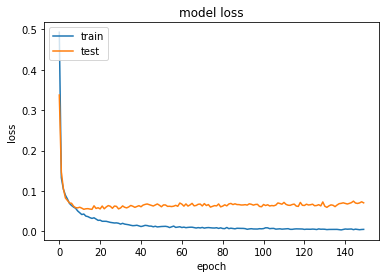

In [98]:
plt.plot(history_7.history['acc'])
plt.plot(history_7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**val_acc = 0.9881**


이 layer구조는 train과 test의 차이가 크다. 개별로 ㅇㅂㅍㅌㅡㅡ



model4 (input -  256 - 128 - 64 - output)


model5 (input - 128 - 256 - 128 - 64 - output)


model6 (input - 128 - 256 - 256 - 128 - 64 - output)

model7 (input - 128 - 256 - 128 - 64 - 32- output)

를 비교하였을 때, test와 train의 차이가 적고 acc가 높은 model_5구조가 적합하다고 판단된다.

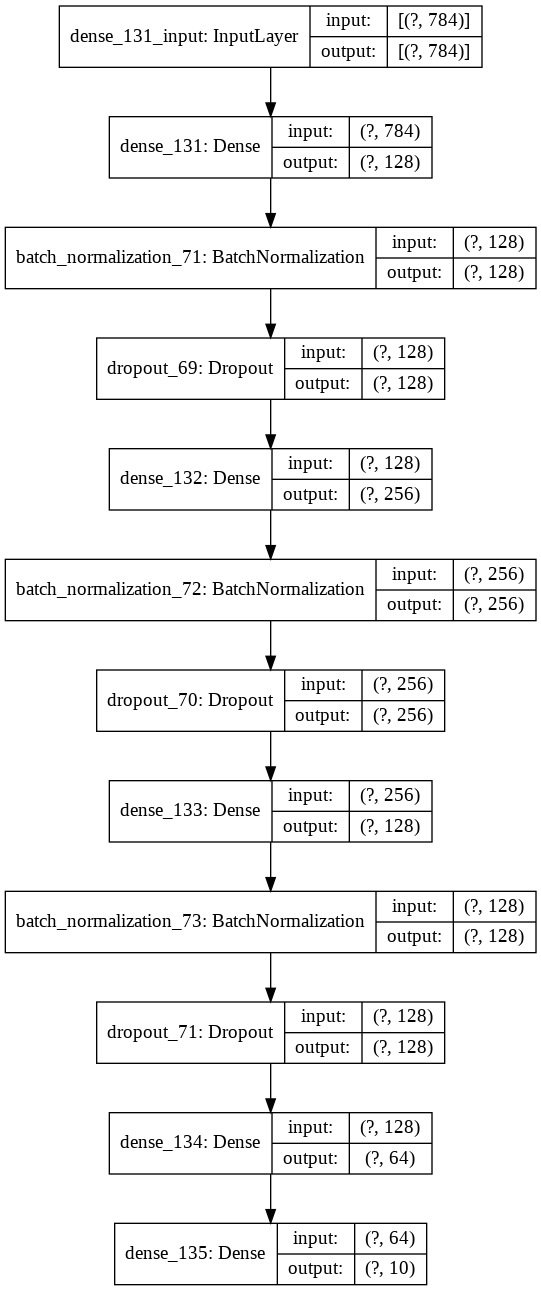

In [103]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, to_file = 'model_5.png', show_shapes = True, show_layer_names = True)

**Keras callback함수**

**ModelCheckpoint** :  모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간 저장. 학습시간이 오래걸린다면, 모델이 개선된 validation score를 도출해낼 때마다 weight를 중간 저장함으로써, 혹시 중간에 memory overflow나 crash가 나더라도 다시 weight를 불러와서 학습을 이어나갈 수 있기 때문에, 시간을 save해 줄 수 있다.


**EarlyStopping** : model의 성능 지표가 설정한 epoch동안 개선되지 않을 때 조기 종료

**ReduceLROnPlateau** : Local Minima에 빠져 더이상 학습률이 개선되지 않고 정체되었을 때, learning rate를 늘리거나 줄여주는 방법으로 빠져나온다. 
(keras_radam으로 불러와서 하니까 안되네염...8ㅁ8 )

https://keras.io/callbacks/

In [0]:
from keras.callbacks import ReduceLROnPlateau
import keras
reduceLR = ReduceLROnPlateau( #adam에서는 됐는데 , import해온 radam에서 안된다...
                             #tf optimizer가 안맞나..?
    monitor='val_loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=10,         # epoch 10 동안 개선되지 않으면 callback이 호출
)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(epochs, batch_size)
checkpoint = ModelCheckpoint(filename,             # file명을 지정
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # best 값만 저장
                             mode='auto'           # auto는 알아서 best를 찾는다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=10,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

In [126]:
opt = RAdamOptimizer(learning_rate=1e-3)
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="swish",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

model_5.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = Radam

history_5 = model_5.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val],
                    verbose = 2,
                    callbacks=[checkpoint, earlystopping])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150

Epoch 00001: val_loss did not improve from 0.05173
35700/35700 - 5s - loss: 2.3474 - acc: 0.1988 - val_loss: 2.1588 - val_acc: 0.4057
Epoch 2/150

Epoch 00002: val_loss did not improve from 0.05173
35700/35700 - 1s - loss: 1.2231 - acc: 0.6422 - val_loss: 1.7043 - val_acc: 0.7697
Epoch 3/150

Epoch 00003: val_loss did not improve from 0.05173
35700/35700 - 1s - loss: 0.6194 - acc: 0.8416 - val_loss: 1.1050 - val_acc: 0.8625
Epoch 4/150

Epoch 00004: val_loss did not improve from 0.05173
35700/35700 - 1s - loss: 0.3854 - acc: 0.8998 - val_loss: 0.6368 - val_acc: 0.9114
Epoch 5/150

Epoch 00005: val_loss did not improve from 0.05173
35700/35700 - 1s - loss: 0.2793 - acc: 0.9247 - val_loss: 0.3678 - val_acc: 0.9351
Epoch 6/150

Epoch 00006: val_loss did not improve from 0.05173
35700/35700 - 1s - loss: 0.2231 - acc: 0.9383 - val_loss: 0.2316 - val_acc: 0.9508
Epoch 7/150

Epoch 00007: val_loss did not improve from 0.05173
35700

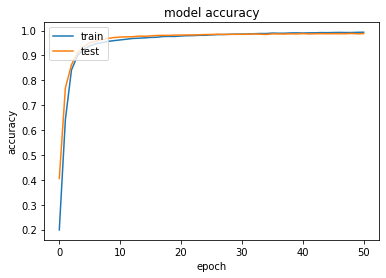

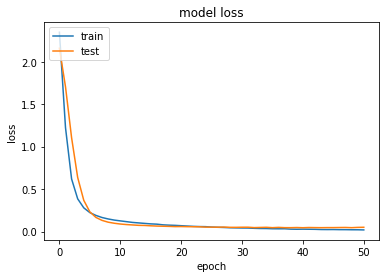

In [128]:
plt.plot(history_5.history['acc'])
plt.plot(history_5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

epoch= 150 일 때의 val_acc = 0.9895


keras callback함수 ModelCheckpoint, EarlyStopping사용 :

epoch =51에서 조기 종료
val_acc = 0.9881


*EarlyStopping과 ModelCheckpoint 콜백의 조합을 통하여, 개선되지 않는 학습에 대한 조기 종료를 실행하고, ModelCheckpoint로 부터 가장 best model을 다시 로드하여 학습을 재게할 수 있다.*


# **CNN**

data가 image, CNN을 사용해보자


In [177]:

print('The shape of train set now is',X.shape)
X = np.reshape(X,(-1,28,28,1)) #1D -> 2D
print('The shape of train set now is',X.shape)

The shape of train set now is (42000, 784)
The shape of train set now is (42000, 28, 28, 1)


In [0]:
x_train,x_val,y_train,y_val = train_test_split(X, y, train_size=0.85,random_state=10) #train set과 validation set으로 구분

(35700, 28, 28, 1) 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


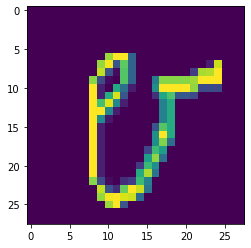

In [179]:
print(x_train.shape, y_train[0].argmax())
print(y_train[0])
plt.imshow(x_train[0][:,:,0])

**Model_C1**


activation function = swish

optimizer = RAdam

Dropout

weight initialization = He

batch_size=1024

epochs=150


(weight initialization method (He)와 batch_size(1024), epoch(150)는 고정하고 비교,

batch normalization과 drop은 layer마다 사용)

callback function - checkpoint, earlystopping 사용

-CNN의 padding pooling에 해당하는 parameter들은 변경하지 않음 -

구조는 그림으로 첨부

In [180]:

model_C = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1),
                         activation ='swish', kernel_initializer='he_normal'),
                         
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Conv2D(128, (3,3), padding='same', 
                         activation ='swish', kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(64, (3,3), padding='same', 
                         activation ='swish', kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation = "swish",kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax',kernel_initializer='he_normal')


])

model_C.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = Radam
model_C.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_131 (Bat (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_129 (Dropout)        (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_132 (Bat (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 7, 128)       

In [181]:
history_C = model_C.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[x_val,y_val],
                    verbose = 2,
                    callbacks=[checkpoint, earlystopping])

Train on 35700 samples, validate on 6300 samples
Epoch 1/150

Epoch 00001: val_loss did not improve from 0.00607
35700/35700 - 13s - loss: 0.2569 - acc: 0.9216 - val_loss: 0.0952 - val_acc: 0.9687
Epoch 2/150

Epoch 00002: val_loss did not improve from 0.00607
35700/35700 - 7s - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0919 - val_acc: 0.9679
Epoch 3/150

Epoch 00003: val_loss did not improve from 0.00607
35700/35700 - 7s - loss: 0.0321 - acc: 0.9897 - val_loss: 0.0912 - val_acc: 0.9797
Epoch 4/150

Epoch 00004: val_loss did not improve from 0.00607
35700/35700 - 7s - loss: 0.0268 - acc: 0.9918 - val_loss: 0.1354 - val_acc: 0.9571
Epoch 5/150

Epoch 00005: val_loss did not improve from 0.00607
35700/35700 - 7s - loss: 0.0226 - acc: 0.9925 - val_loss: 0.1043 - val_acc: 0.9740
Epoch 6/150

Epoch 00006: val_loss did not improve from 0.00607
35700/35700 - 7s - loss: 0.0208 - acc: 0.9938 - val_loss: 0.0762 - val_acc: 0.9797
Epoch 7/150

Epoch 00007: val_loss did not improve from 0.00607
3570

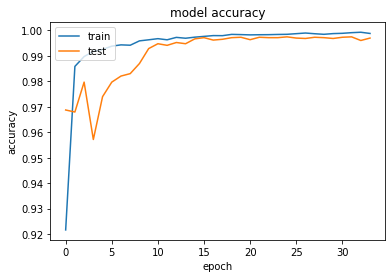

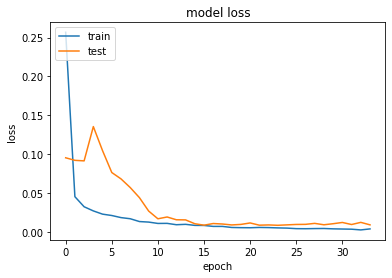

In [182]:
plt.plot(history_C.history['acc'])
plt.plot(history_C.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_C.history['loss'])
plt.plot(history_C.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**checkpoint, earlystopping -> epoch=34, val_acc =  0.9970**

 **Image Argumentation**


 overfitting을 방지하기 위해 image data를 약간씩 변형하여 data를 늘려준다. (rotation,zoom,블러,noise추가 등등 다양한 방식이 있다.)

In [0]:
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range = 0.15,
                             height_shift_range = 0.15,
                             shear_range = 0.15,
                             zoom_range = 0.4,)

datagen.fit(x_train)

In [184]:

model_C2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1),
                         activation ='swish', kernel_initializer='he_normal'),
                         
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Conv2D(128, (3,3), padding='same', 
                         activation ='swish', kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(64, (3,3), padding='same', 
                         activation ='swish', kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation = "swish",kernel_initializer='he_normal'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax',kernel_initializer='he_normal')

])


model_C2.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_135 (Bat (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_136 (Bat (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 128)       

In [0]:
model_C2.compile(optimizer=opt ,loss="categorical_crossentropy",metrics=['accuracy'])
#opt = adam으로 해서 learning_rate_reduction도 해보쟝~

In [186]:
#imagedatagenerator를 사용했으므로 fit_generator사용
history_C2 = model_C2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2,
                              callbacks=[checkpoint, earlystopping,])

Epoch 1/150
Epoch 1/150
6300/35 - 4s - loss: 1.6586 - acc: 0.6059

Epoch 00001: val_loss did not improve from 0.00607
35/35 - 23s - loss: 0.6534 - acc: 0.7873 - val_loss: 1.6777 - val_acc: 0.6059
Epoch 2/150
Epoch 1/150
6300/35 - 0s - loss: 4.1634 - acc: 0.1684

Epoch 00002: val_loss did not improve from 0.00607
35/35 - 9s - loss: 0.1959 - acc: 0.9362 - val_loss: 4.2925 - val_acc: 0.1684
Epoch 3/150
Epoch 1/150
6300/35 - 0s - loss: 4.6480 - acc: 0.1573

Epoch 00003: val_loss did not improve from 0.00607
35/35 - 12s - loss: 0.1525 - acc: 0.9495 - val_loss: 4.8375 - val_acc: 0.1573
Epoch 4/150
Epoch 1/150
6300/35 - 0s - loss: 5.3745 - acc: 0.1041

Epoch 00004: val_loss did not improve from 0.00607
35/35 - 12s - loss: 0.1308 - acc: 0.9569 - val_loss: 5.5293 - val_acc: 0.1041
Epoch 5/150
Epoch 1/150
6300/35 - 0s - loss: 5.9147 - acc: 0.1033

Epoch 00005: val_loss did not improve from 0.00607
35/35 - 12s - loss: 0.1151 - acc: 0.9625 - val_loss: 6.0683 - val_acc: 0.1033
Epoch 6/150
Epoch 1/1

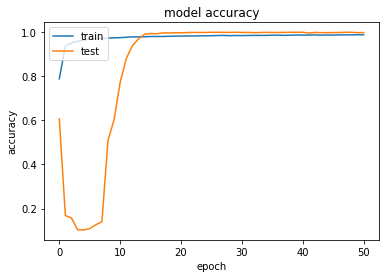

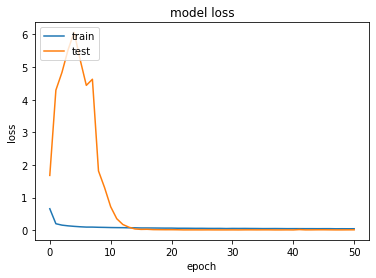

In [187]:
plt.plot(history_C2.history['acc'])
plt.plot(history_C2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_C2.history['loss'])
plt.plot(history_C2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

val_acc =  0.9967(max val_acc = 0.9981)

이미 accuracy가 너무 높아서 그런지 image argumentation이 크게 효과를 내지 못했다.

# 결론

DNN : 5층(input - 128 - 256 - 128 - 64 - output)


activation function = swish

optimizer = RAdam

callback 함수  :ModelCheckpoint, EarlyStopping

(Dropout(0.2),weight initialization = He)


이 성능이 가장 좋았고, (0.98~)

CNN을 사용한것이 DNN보다 성능이 좋았다.(0.997/0.998)